# Pandas
> If you have data that looks like Excel, pandas is your friend

It's possible that Python wouldn't have become [the lingua franca of data science if it wasn't for pandas](https://stackoverflow.blog/2017/09/14/python-growing-quickly/). The package's exponential growth on Stack Overflow means two things:
1. It's getting increasingly popular.
2. It can be frustratinng to use sometimes (hence the high number of questions).

This repo contains a few peculiar things I've learned about pandas that have made my life easier and my code faster. This post isn't a friendly tutorial for beginners, but a friendly introduction to pandas weirdness.

![](https://i.pinimg.com/originals/9e/7c/78/9e7c7816c30327890dc94ba16e5dac1b.jpg)

To everyone trying to master pandas an writing somewhat beautiful pandas I recommend to look at the not so [Modern Pandas](http://tomaugspurger.github.io/modern-1-intro.html) from Tom Augpurger.

In [99]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
DATA_PATH = Path('data')
csv_file = DATA_PATH/'one_day.csv'

you can easily import csv data...

In [101]:
df = pd.read_csv(csv_file)

In [102]:
df.head()

image_utc_datetime  zone_name  camera_#  camera_latitude  \
0  2019-06-21 03:00:01.150  Z_Tenesol         1        45.815492   
1  2019-06-21 03:01:01.210  Z_Tenesol         1        45.815492   
2  2019-06-21 03:02:01.200  Z_Tenesol         1        45.815492   
3  2019-06-21 03:03:01.180  Z_Tenesol         1        45.815492   
4  2019-06-21 03:04:01.170  Z_Tenesol         1        45.815492   

   camera_longitude  camera_altitude      timezone  \
0          4.726482              0.0  Europe/Paris   
1          4.726482              0.0  Europe/Paris   
2          4.726482              0.0  Europe/Paris   
3          4.726482              0.0  Europe/Paris   
4          4.726482              0.0  Europe/Paris   

                      image_name              image_local_datetime  \
0  image19-06-21_03-00-01-15.png  2019-06-21 03:00:01.150000+02:00   
1  image19-06-21_03-01-01-21.png  2019-06-21 03:01:01.210000+02:00   
2  image19-06-21_03-02-01-20.png  2019-06-21 03:02:01.200000+02:00   
3  image19-06-21_03-03-01-18.png  2019-06-21 03:03:01.180000+02:00   
4  image19-06-21_03-04-01-17.png  2019-06-21 03:04:01.170000+02:00   

                  csv_name  ... B_S_albedo W_S_albedo  albedo_priority  \
0  2019_06_21_03_00_32.csv  ...       0.15       0.17                1   
1  2019_06_21_03_01_02.csv  ...       0.15       0.17                1   
2  2019_06_21_03_02_04.csv  ...       0.15       0.17                1   
3  2019_06_21_03_03_05.csv  ...       0.15       0.17                1   
4  2019_06_21_03_04_06.csv  ...       0.15       0.17                1   

   Module_tilt  Module_azimuth  Module_sun_incidence   Kt  \
0         30.0           180.0                   0.0  inf   
1         30.0           180.0                   0.0  inf   
2         30.0           180.0                   0.0  NaN   
3         30.0           180.0                   0.0  inf   
4         30.0           180.0                   0.0  inf   

                                                     image_path  \
0  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-00-01-15.png   
1  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-01-01-21.png   
2  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-02-01-20.png   
3  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-03-01-18.png   
4  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-04-01-17.png   

                        mask_cam_path  \
0  Z_Tenesol/camera_01/mask_cam01.png   
1  Z_Tenesol/camera_01/mask_cam01.png   
2  Z_Tenesol/camera_01/mask_cam01.png   
3  Z_Tenesol/camera_01/mask_cam01.png   
4  Z_Tenesol/camera_01/mask_cam01.png   

                                                 csv_path  
0  Z_Tenesol/camera_01/2019-06-21/2019_06_21_03_00_32.csv  
1  Z_Tenesol/camera_01/2019-06-21/2019_06_21_03_01_02.csv  
2  Z_Tenesol/camera_01/2019-06-21/2019_06_21_03_02_04.csv  
3  Z_Tenesol/camera_01/2019-06-21/2019_06_21_03_03_05.csv  
4  Z_Tenesol/camera_01/2019-06-21/2019_06_21_03_04_06.csv  

[5 rows x 36 columns]

this df has a `pd.DatetimeIndex`, we can flag this on import.

In [103]:
df = pd.read_csv(csv_file, index_col='image_utc_datetime', parse_dates=True)
df.head()

zone_name  camera_#  camera_latitude  \
image_utc_datetime                                              
2019-06-21 03:00:01.150  Z_Tenesol         1        45.815492   
2019-06-21 03:01:01.210  Z_Tenesol         1        45.815492   
2019-06-21 03:02:01.200  Z_Tenesol         1        45.815492   
2019-06-21 03:03:01.180  Z_Tenesol         1        45.815492   
2019-06-21 03:04:01.170  Z_Tenesol         1        45.815492   

                         camera_longitude  camera_altitude      timezone  \
image_utc_datetime                                                         
2019-06-21 03:00:01.150          4.726482              0.0  Europe/Paris   
2019-06-21 03:01:01.210          4.726482              0.0  Europe/Paris   
2019-06-21 03:02:01.200          4.726482              0.0  Europe/Paris   
2019-06-21 03:03:01.180          4.726482              0.0  Europe/Paris   
2019-06-21 03:04:01.170          4.726482              0.0  Europe/Paris   

                                            image_name  \
image_utc_datetime                                       
2019-06-21 03:00:01.150  image19-06-21_03-00-01-15.png   
2019-06-21 03:01:01.210  image19-06-21_03-01-01-21.png   
2019-06-21 03:02:01.200  image19-06-21_03-02-01-20.png   
2019-06-21 03:03:01.180  image19-06-21_03-03-01-18.png   
2019-06-21 03:04:01.170  image19-06-21_03-04-01-17.png   

                                     image_local_datetime  \
image_utc_datetime                                          
2019-06-21 03:00:01.150  2019-06-21 03:00:01.150000+02:00   
2019-06-21 03:01:01.210  2019-06-21 03:01:01.210000+02:00   
2019-06-21 03:02:01.200  2019-06-21 03:02:01.200000+02:00   
2019-06-21 03:03:01.180  2019-06-21 03:03:01.180000+02:00   
2019-06-21 03:04:01.170  2019-06-21 03:04:01.170000+02:00   

                                        csv_name         csv_utc_datetime  \
image_utc_datetime                                                          
2019-06-21 03:00:01.150  2019_06_21_03_00_32.csv  2019-06-21 03:00:32.000   
2019-06-21 03:01:01.210  2019_06_21_03_01_02.csv  2019-06-21 03:01:02.000   
2019-06-21 03:02:01.200  2019_06_21_03_02_04.csv  2019-06-21 03:02:04.000   
2019-06-21 03:03:01.180  2019_06_21_03_03_05.csv  2019-06-21 03:03:05.000   
2019-06-21 03:04:01.170  2019_06_21_03_04_06.csv  2019-06-21 03:04:06.000   

                         ... B_S_albedo  W_S_albedo  albedo_priority  \
image_utc_datetime       ...                                           
2019-06-21 03:00:01.150  ...       0.15        0.17                1   
2019-06-21 03:01:01.210  ...       0.15        0.17                1   
2019-06-21 03:02:01.200  ...       0.15        0.17                1   
2019-06-21 03:03:01.180  ...       0.15        0.17                1   
2019-06-21 03:04:01.170  ...       0.15        0.17                1   

                         Module_tilt  Module_azimuth  Module_sun_incidence  \
image_utc_datetime                                                           
2019-06-21 03:00:01.150         30.0           180.0                   0.0   
2019-06-21 03:01:01.210         30.0           180.0                   0.0   
2019-06-21 03:02:01.200         30.0           180.0                   0.0   
2019-06-21 03:03:01.180         30.0           180.0                   0.0   
2019-06-21 03:04:01.170         30.0           180.0                   0.0   

                          Kt  \
image_utc_datetime             
2019-06-21 03:00:01.150  inf   
2019-06-21 03:01:01.210  inf   
2019-06-21 03:02:01.200  NaN   
2019-06-21 03:03:01.180  inf   
2019-06-21 03:04:01.170  inf   

                                                                           image_path  \
image_utc_datetime                                                                      
2019-06-21 03:00:01.150  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-00-01-15.png   
2019-06-21 03:01:01.210  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-01-01-21.png   
2019-06-21 03:02:01.200  Z_T

In [104]:
df.columns

Index(['zone_name', 'camera_#', 'camera_latitude', 'camera_longitude',
       'camera_altitude', 'timezone', 'image_name', 'image_local_datetime',
       'csv_name', 'csv_utc_datetime', 'csv_local_datetime', 'ghi',
       'Sun_elevation', 'Sun_elevation_with_refr_corr', 'Sun_azimuth_I0',
       'TOAI', 'BHI_cs', 'BNI_cs', 'BTI_cs', 'DHI_cs', 'DTI_cs', 'GHI_cs',
       'GTI_cs', 'RTI_cs', 'TLAM2', 'B_S_albedo', 'W_S_albedo',
       'albedo_priority', 'Module_tilt', 'Module_azimuth',
       'Module_sun_incidence', 'Kt', 'image_path', 'mask_cam_path',
       'csv_path'],
      dtype='object')

## Data exploration
When analyzing data, you might want to take a look at the data. pandas has some great built-in functions for that.

`.head()`, `.tail()`, `.describe()`, `.info()`
You're probably familiar with `.head()` and `.tail()` methods for showing the first/last rows of `DataFrame`. By default, 5 rows are shown, but you can specify the exact number.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2019-06-21 03:00:01.150000 to 2019-06-21 20:59:01.220000
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   zone_name                     1080 non-null   object 
 1   camera_#                      1080 non-null   int64  
 2   camera_latitude               1080 non-null   float64
 3   camera_longitude              1080 non-null   float64
 4   camera_altitude               1080 non-null   float64
 5   timezone                      1080 non-null   object 
 6   image_name                    1080 non-null   object 
 7   image_local_datetime          1080 non-null   object 
 8   csv_name                      1080 non-null   object 
 9   csv_utc_datetime              1080 non-null   object 
 10  csv_local_datetime            1080 non-null   object 
 11  ghi                           1080 non-null   float64
 12  Sun_elevatio

Gnerate statistics about numeric columns.

In [106]:
df.describe()

camera_#  camera_latitude  camera_longitude  camera_altitude  \
count    1080.0     1.080000e+03      1.080000e+03           1080.0   
mean        1.0     4.581549e+01      4.726482e+00              0.0   
std         0.0     7.108719e-15      8.885899e-16              0.0   
min         1.0     4.581549e+01      4.726482e+00              0.0   
25%         1.0     4.581549e+01      4.726482e+00              0.0   
50%         1.0     4.581549e+01      4.726482e+00              0.0   
75%         1.0     4.581549e+01      4.726482e+00              0.0   
max         1.0     4.581549e+01      4.726482e+00              0.0   

               ghi  Sun_elevation  Sun_elevation_with_refr_corr  \
count  1080.000000    1080.000000                   1080.000000   
mean    208.929609      31.591709                    184.285527   
std     194.612519      24.649776                     92.707985   
min       0.000000     -11.397000                     44.574000   
25%      14.376265       9.346250                     91.316500   
50%     179.567883      32.032500                    189.973500   
75%     341.704840      54.781750                    274.561000   
max     912.319698      67.633000                    322.136000   

       Sun_azimuth_I0         TOAI       BHI_cs  ...       GTI_cs  \
count          1080.0  1080.000000  1080.000000  ...  1080.000000   
mean           1320.5   645.798611   380.639167  ...   455.145278   
std               0.0   440.917364   302.194599  ...   385.873655   
min            1320.5     0.000000     0.000000  ...     0.000000   
25%            1320.5   212.300000    54.475000  ...    35.900000   
50%            1320.5   699.850000   374.650000  ...   420.700000   
75%            1320.5  1078.575000   686.925000  ...   851.900000   
max            1320.5  1221.000000   811.100000  ...  1021.300000   

            RTI_cs         TLAM2   B_S_albedo    W_S_albedo  albedo_priority  \
count  1080.000000  1.080000e+03  1080.000000  1.080000e+03           1080.0   
mean      5.384444  3.740000e+00     0.161231  1.700000e-01              1.0   
std       4.110548  1.332885e-15     0.014092  5.553687e-17              0.0   
min       0.000000  3.740000e+00     0.150000  1.700000e-01              1.0   
25%       1.100000  3.740000e+00     0.150000  1.700000e-01              1.0   
50%       5.300000  3.740000e+00     0.150000  1.700000e-01              1.0   
75%       9.400000  3.740000e+00     0.170000  1.700000e-01              1.0   
max      11.500000  3.740000e+00     0.190000  1.700000e-01              1.0   

       Module_tilt  Module_azimuth  Module_sun_incidence           Kt  
count       1080.0          1080.0                1080.0  1017.000000  
mean          30.0           180.0                   0.0          inf  
std            0.0             0.0                   0.0          NaN  
min           30.0           180.0                   0.0     0.000000  
25%           30.0           180.0                   0.0     0.173800  
50%           30.0           180.0                   0.0     0.375342  
75%           30.0           180.0                   0.0     0.696452  
max           30.0           180.0                   0.0          inf  

[8 rows x 25 columns]

Count unique values over a column

In [107]:
df.camera_altitude.nunique()

1

over all columns:

In [108]:
df.nunique()

zone_name                          1
camera_#                           1
camera_latitude                    1
camera_longitude                   1
camera_altitude                    1
timezone                           1
image_name                      1080
image_local_datetime            1080
csv_name                        1080
csv_utc_datetime                1080
csv_local_datetime              1080
ghi                              874
Sun_elevation                   1080
Sun_elevation_with_refr_corr    1080
Sun_azimuth_I0                     1
TOAI                             920
BHI_cs                           917
BNI_cs                           870
BTI_cs                           767
DHI_cs                           632
DTI_cs                           723
GHI_cs                           950
GTI_cs                           948
RTI_cs                           116
TLAM2                              1
B_S_albedo                         5
W_S_albedo                         1
a

## Selecting

### `.loc[]` lets you select rows based on one of the two things:
- boolean masks
- labels

In [109]:
df.loc['5h 21/6/2019':'7h 21/6/2019']

zone_name  camera_#  camera_latitude  \
image_utc_datetime                                              
2019-06-21 05:00:01.190  Z_Tenesol         1        45.815492   
2019-06-21 05:01:01.180  Z_Tenesol         1        45.815492   
2019-06-21 05:02:01.160  Z_Tenesol         1        45.815492   
2019-06-21 05:03:01.230  Z_Tenesol         1        45.815492   
2019-06-21 05:04:01.210  Z_Tenesol         1        45.815492   
...                            ...       ...              ...   
2019-06-21 07:55:01.220  Z_Tenesol         1        45.815492   
2019-06-21 07:56:01.210  Z_Tenesol         1        45.815492   
2019-06-21 07:57:01.190  Z_Tenesol         1        45.815492   
2019-06-21 07:58:01.180  Z_Tenesol         1        45.815492   
2019-06-21 07:59:01.160  Z_Tenesol         1        45.815492   

                         camera_longitude  camera_altitude      timezone  \
image_utc_datetime                                                         
2019-06-21 05:00:01.190          4.726482              0.0  Europe/Paris   
2019-06-21 05:01:01.180          4.726482              0.0  Europe/Paris   
2019-06-21 05:02:01.160          4.726482              0.0  Europe/Paris   
2019-06-21 05:03:01.230          4.726482              0.0  Europe/Paris   
2019-06-21 05:04:01.210          4.726482              0.0  Europe/Paris   
...                                   ...              ...           ...   
2019-06-21 07:55:01.220          4.726482              0.0  Europe/Paris   
2019-06-21 07:56:01.210          4.726482              0.0  Europe/Paris   
2019-06-21 07:57:01.190          4.726482              0.0  Europe/Paris   
2019-06-21 07:58:01.180          4.726482              0.0  Europe/Paris   
2019-06-21 07:59:01.160          4.726482              0.0  Europe/Paris   

                                            image_name  \
image_utc_datetime                                       
2019-06-21 05:00:01.190  image19-06-21_05-00-01-19.png   
2019-06-21 05:01:01.180  image19-06-21_05-01-01-18.png   
2019-06-21 05:02:01.160  image19-06-21_05-02-01-16.png   
2019-06-21 05:03:01.230  image19-06-21_05-03-01-23.png   
2019-06-21 05:04:01.210  image19-06-21_05-04-01-21.png   
...                                                ...   
2019-06-21 07:55:01.220  image19-06-21_07-55-01-22.png   
2019-06-21 07:56:01.210  image19-06-21_07-56-01-21.png   
2019-06-21 07:57:01.190  image19-06-21_07-57-01-19.png   
2019-06-21 07:58:01.180  image19-06-21_07-58-01-18.png   
2019-06-21 07:59:01.160  image19-06-21_07-59-01-16.png   

                                     image_local_datetime  \
image_utc_datetime                                          
2019-06-21 05:00:01.190  2019-06-21 05:00:01.190000+02:00   
2019-06-21 05:01:01.180  2019-06-21 05:01:01.180000+02:00   
2019-06-21 05:02:01.160  2019-06-21 05:02:01.160000+02:00   
2019-06-21 05:03:01.230  2019-06-21 05:03:01.230000+02:00   
2019-06-21 05:04:01.210  2019-06-21 05:04:01.210000+02:00   
...                                                   ...   
2019-06-21 07:55:01.220  2019-06-21 07:55:01.220000+02:00   
2019-06-21 07:56:01.210  2019-06-21 07:56:01.210000+02:00   
2019-06-21 07:57:01.190  2019-06-21 07:57:01.190000+02:00   
2019-06-21 07:58:01.180  2019-06-21 07:58:01.180000+02:00   
2019-06-21 07:59:01.160  2019-06-21 07:59:01.160000+02:00   

                                        csv_name         csv_utc_datetime  \
image_utc_datetime                                                          
2019-06-21 05:00:01.190  2019_06_21_05_00_09.csv  2019-06-21 05:00:09.000   
2019-06-21 05:01:01.180  2019_06_21_05_01_11.csv  2019-06-21 05:01:11.000   
2019-06-21 05:02:01.160  2019_06_21_05_02_12.csv  2019-06-21 05:02:12.000   
2019-06-21 05:03:01.230  2019_06_21_05_03_14.csv  2019-06-21 05:03:14.000   
2019-06-21 05:04:01.210  2019_06_21_05_04_15.csv  2019-06-21 05:04:15.000   
...                                          ...                      ...   
2019-06-21 07:55:01.220  

In [110]:
df.loc[:, ['ghi', 'camera_longitude']].head()

ghi  camera_longitude
image_utc_datetime                                 
2019-06-21 03:00:01.150  0.004120          4.726482
2019-06-21 03:01:01.210  0.008239          4.726482
2019-06-21 03:02:01.200  0.000000          4.726482
2019-06-21 03:03:01.180  0.004120          4.726482
2019-06-21 03:04:01.170  0.008239          4.726482

#### 3.2.1 Selecting rows by boolean masks
If you want to select all the rows where `ghi` is close to `GHI_cs` you can do the following:
1. Create a boolean mask on whether the `ghi` is close to `GHI_cs`
2. Use that mask to select rows

In [111]:
 mask = (df.ghi - df.GHI_cs) <= 10

you can either use `.loc` or directly index over the `DataFrame.

In [112]:
df[mask].head()

zone_name  camera_#  camera_latitude  \
image_utc_datetime                                              
2019-06-21 03:00:01.150  Z_Tenesol         1        45.815492   
2019-06-21 03:01:01.210  Z_Tenesol         1        45.815492   
2019-06-21 03:02:01.200  Z_Tenesol         1        45.815492   
2019-06-21 03:03:01.180  Z_Tenesol         1        45.815492   
2019-06-21 03:04:01.170  Z_Tenesol         1        45.815492   

                         camera_longitude  camera_altitude      timezone  \
image_utc_datetime                                                         
2019-06-21 03:00:01.150          4.726482              0.0  Europe/Paris   
2019-06-21 03:01:01.210          4.726482              0.0  Europe/Paris   
2019-06-21 03:02:01.200          4.726482              0.0  Europe/Paris   
2019-06-21 03:03:01.180          4.726482              0.0  Europe/Paris   
2019-06-21 03:04:01.170          4.726482              0.0  Europe/Paris   

                                            image_name  \
image_utc_datetime                                       
2019-06-21 03:00:01.150  image19-06-21_03-00-01-15.png   
2019-06-21 03:01:01.210  image19-06-21_03-01-01-21.png   
2019-06-21 03:02:01.200  image19-06-21_03-02-01-20.png   
2019-06-21 03:03:01.180  image19-06-21_03-03-01-18.png   
2019-06-21 03:04:01.170  image19-06-21_03-04-01-17.png   

                                     image_local_datetime  \
image_utc_datetime                                          
2019-06-21 03:00:01.150  2019-06-21 03:00:01.150000+02:00   
2019-06-21 03:01:01.210  2019-06-21 03:01:01.210000+02:00   
2019-06-21 03:02:01.200  2019-06-21 03:02:01.200000+02:00   
2019-06-21 03:03:01.180  2019-06-21 03:03:01.180000+02:00   
2019-06-21 03:04:01.170  2019-06-21 03:04:01.170000+02:00   

                                        csv_name         csv_utc_datetime  \
image_utc_datetime                                                          
2019-06-21 03:00:01.150  2019_06_21_03_00_32.csv  2019-06-21 03:00:32.000   
2019-06-21 03:01:01.210  2019_06_21_03_01_02.csv  2019-06-21 03:01:02.000   
2019-06-21 03:02:01.200  2019_06_21_03_02_04.csv  2019-06-21 03:02:04.000   
2019-06-21 03:03:01.180  2019_06_21_03_03_05.csv  2019-06-21 03:03:05.000   
2019-06-21 03:04:01.170  2019_06_21_03_04_06.csv  2019-06-21 03:04:06.000   

                         ... B_S_albedo  W_S_albedo  albedo_priority  \
image_utc_datetime       ...                                           
2019-06-21 03:00:01.150  ...       0.15        0.17                1   
2019-06-21 03:01:01.210  ...       0.15        0.17                1   
2019-06-21 03:02:01.200  ...       0.15        0.17                1   
2019-06-21 03:03:01.180  ...       0.15        0.17                1   
2019-06-21 03:04:01.170  ...       0.15        0.17                1   

                         Module_tilt  Module_azimuth  Module_sun_incidence  \
image_utc_datetime                                                           
2019-06-21 03:00:01.150         30.0           180.0                   0.0   
2019-06-21 03:01:01.210         30.0           180.0                   0.0   
2019-06-21 03:02:01.200         30.0           180.0                   0.0   
2019-06-21 03:03:01.180         30.0           180.0                   0.0   
2019-06-21 03:04:01.170         30.0           180.0                   0.0   

                          Kt  \
image_utc_datetime             
2019-06-21 03:00:01.150  inf   
2019-06-21 03:01:01.210  inf   
2019-06-21 03:02:01.200  NaN   
2019-06-21 03:03:01.180  inf   
2019-06-21 03:04:01.170  inf   

                                                                           image_path  \
image_utc_datetime                                                                      
2019-06-21 03:00:01.150  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-00-01-15.png   
2019-06-21 03:01:01.210  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-01-01-21.png   
2019-06-21 03:02:01.200  Z_T

In [113]:
df.loc[mask].head()

zone_name  camera_#  camera_latitude  \
image_utc_datetime                                              
2019-06-21 03:00:01.150  Z_Tenesol         1        45.815492   
2019-06-21 03:01:01.210  Z_Tenesol         1        45.815492   
2019-06-21 03:02:01.200  Z_Tenesol         1        45.815492   
2019-06-21 03:03:01.180  Z_Tenesol         1        45.815492   
2019-06-21 03:04:01.170  Z_Tenesol         1        45.815492   

                         camera_longitude  camera_altitude      timezone  \
image_utc_datetime                                                         
2019-06-21 03:00:01.150          4.726482              0.0  Europe/Paris   
2019-06-21 03:01:01.210          4.726482              0.0  Europe/Paris   
2019-06-21 03:02:01.200          4.726482              0.0  Europe/Paris   
2019-06-21 03:03:01.180          4.726482              0.0  Europe/Paris   
2019-06-21 03:04:01.170          4.726482              0.0  Europe/Paris   

                                            image_name  \
image_utc_datetime                                       
2019-06-21 03:00:01.150  image19-06-21_03-00-01-15.png   
2019-06-21 03:01:01.210  image19-06-21_03-01-01-21.png   
2019-06-21 03:02:01.200  image19-06-21_03-02-01-20.png   
2019-06-21 03:03:01.180  image19-06-21_03-03-01-18.png   
2019-06-21 03:04:01.170  image19-06-21_03-04-01-17.png   

                                     image_local_datetime  \
image_utc_datetime                                          
2019-06-21 03:00:01.150  2019-06-21 03:00:01.150000+02:00   
2019-06-21 03:01:01.210  2019-06-21 03:01:01.210000+02:00   
2019-06-21 03:02:01.200  2019-06-21 03:02:01.200000+02:00   
2019-06-21 03:03:01.180  2019-06-21 03:03:01.180000+02:00   
2019-06-21 03:04:01.170  2019-06-21 03:04:01.170000+02:00   

                                        csv_name         csv_utc_datetime  \
image_utc_datetime                                                          
2019-06-21 03:00:01.150  2019_06_21_03_00_32.csv  2019-06-21 03:00:32.000   
2019-06-21 03:01:01.210  2019_06_21_03_01_02.csv  2019-06-21 03:01:02.000   
2019-06-21 03:02:01.200  2019_06_21_03_02_04.csv  2019-06-21 03:02:04.000   
2019-06-21 03:03:01.180  2019_06_21_03_03_05.csv  2019-06-21 03:03:05.000   
2019-06-21 03:04:01.170  2019_06_21_03_04_06.csv  2019-06-21 03:04:06.000   

                         ... B_S_albedo  W_S_albedo  albedo_priority  \
image_utc_datetime       ...                                           
2019-06-21 03:00:01.150  ...       0.15        0.17                1   
2019-06-21 03:01:01.210  ...       0.15        0.17                1   
2019-06-21 03:02:01.200  ...       0.15        0.17                1   
2019-06-21 03:03:01.180  ...       0.15        0.17                1   
2019-06-21 03:04:01.170  ...       0.15        0.17                1   

                         Module_tilt  Module_azimuth  Module_sun_incidence  \
image_utc_datetime                                                           
2019-06-21 03:00:01.150         30.0           180.0                   0.0   
2019-06-21 03:01:01.210         30.0           180.0                   0.0   
2019-06-21 03:02:01.200         30.0           180.0                   0.0   
2019-06-21 03:03:01.180         30.0           180.0                   0.0   
2019-06-21 03:04:01.170         30.0           180.0                   0.0   

                          Kt  \
image_utc_datetime             
2019-06-21 03:00:01.150  inf   
2019-06-21 03:01:01.210  inf   
2019-06-21 03:02:01.200  NaN   
2019-06-21 03:03:01.180  inf   
2019-06-21 03:04:01.170  inf   

                                                                           image_path  \
image_utc_datetime                                                                      
2019-06-21 03:00:01.150  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-00-01-15.png   
2019-06-21 03:01:01.210  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-01-01-21.png   
2019-06-21 03:02:01.200  Z_T

## Customizing display options

Our `DataFrame` has to many cols,  is cut off in the display above. To show longer columns, you can set `display.max_colwidth` to `100`.

**Note**: set_option has several great options you should check out.

In [114]:
pd.set_option('display.max_colwidth', 100)

## Time operations

Having a `Timeindex` gives access to handy methods:
- `resample` to resample the data

In [115]:
df.resample('5T').mean()

camera_#  camera_latitude  camera_longitude  \
image_utc_datetime                                                 
2019-06-21 03:00:00         1        45.815492          4.726482   
2019-06-21 03:05:00         1        45.815492          4.726482   
2019-06-21 03:10:00         1        45.815492          4.726482   
2019-06-21 03:15:00         1        45.815492          4.726482   
2019-06-21 03:20:00         1        45.815492          4.726482   
...                       ...              ...               ...   
2019-06-21 20:35:00         1        45.815492          4.726482   
2019-06-21 20:40:00         1        45.815492          4.726482   
2019-06-21 20:45:00         1        45.815492          4.726482   
2019-06-21 20:50:00         1        45.815492          4.726482   
2019-06-21 20:55:00         1        45.815492          4.726482   

                     camera_altitude       ghi  Sun_elevation  \
image_utc_datetime                                              
2019-06-21 03:00:00              0.0  0.004943        -7.3254   
2019-06-21 03:05:00              0.0  0.004943        -6.7044   
2019-06-21 03:10:00              0.0  0.002472        -6.0734   
2019-06-21 03:15:00              0.0  0.003296        -5.4324   
2019-06-21 03:20:00              0.0  0.001648        -4.7818   
...                              ...       ...            ...   
2019-06-21 20:35:00              0.0  0.002472        -8.9278   
2019-06-21 20:40:00              0.0  0.002472        -9.5086   
2019-06-21 20:45:00              0.0  0.001648       -10.0782   
2019-06-21 20:50:00              0.0  0.004120       -10.6358   
2019-06-21 20:55:00              0.0  0.005767       -11.1816   

                     Sun_elevation_with_refr_corr  Sun_azimuth_I0  TOAI  \
image_utc_datetime                                                        
2019-06-21 03:00:00                       44.9644          1320.5   0.0   
2019-06-21 03:05:00                       45.9354          1320.5   0.0   
2019-06-21 03:10:00                       46.8994          1320.5   0.0   
2019-06-21 03:15:00                       47.8548          1320.5   0.0   
2019-06-21 03:20:00                       48.8028          1320.5   0.0   
...                                           ...             ...   ...   
2019-06-21 20:35:00                      317.6658          1320.5   0.0   
2019-06-21 20:40:00                      318.6676          1320.5   0.0   
2019-06-21 20:45:00                      319.6776          1320.5   0.0   
2019-06-21 20:50:00                      320.6962          1320.5   0.0   
2019-06-21 20:55:00                      321.7232          1320.5   0.0   

                     BHI_cs  ...  GTI_cs  RTI_cs  TLAM2  B_S_albedo  \
image_utc_datetime           ...                                      
2019-06-21 03:00:00     0.0  ...     0.0     0.0   3.74        0.15   
2019-06-21 03:05:00     0.0  ...     0.0     0.0   3.74        0.15   
2019-06-21 03:10:00     0.0  ...     0.0     0.0   3.74        0.15   
2019-06-21 03:15:00     0.0  ...     0.0     0.0   3.74        0.15   
2019-06-21 03:20:00     0.0  ...     0.0     0.0   3.74        0.15   
...                     ...  ...     ...     ...    ...         ...   
2019-06-21 20:35:00     0.0  ...     0.0     0.0   3.74        0.15   
2019-06-21 20:40:00     0.0  ...     0.0     0.0   3.74        0.15   
2019-06-21 20:45:00     0.0  ...     0.0     0.0   3.74        0.15   
2019-06-21 20:50:00     0.0  ...     0.0     0.0   3.74        0.15   
2019-06-21 20:55:00     0.0  ...     0.0     0.0   3.74        0.15   

                     W_S_albedo  albedo_priority  Module_tilt  Module_azimuth  \
image_utc_datetime                                                              
2019-06-21 03:00:00        0.17                1         30.0           180.0   
2019-06-21 03:05:00        0.17                1         30.0           180.0   
2019-06-21 03:10:00        0.17                1         30.0     

## Plotting

timeseries plot

<AxesSubplot:xlabel='image_utc_datetime'>

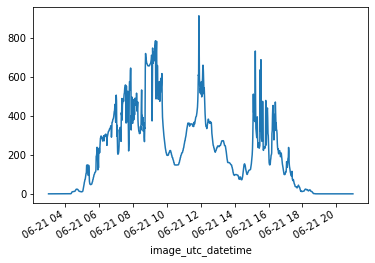

In [116]:
df.loc[:, 'ghi'].plot()

<AxesSubplot:xlabel='image_utc_datetime'>

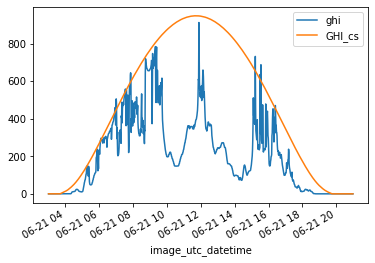

In [117]:
df.loc[:, ['ghi', 'GHI_cs']].plot()

method chaining to make a bar plot per hour

<AxesSubplot:xlabel='image_utc_datetime'>

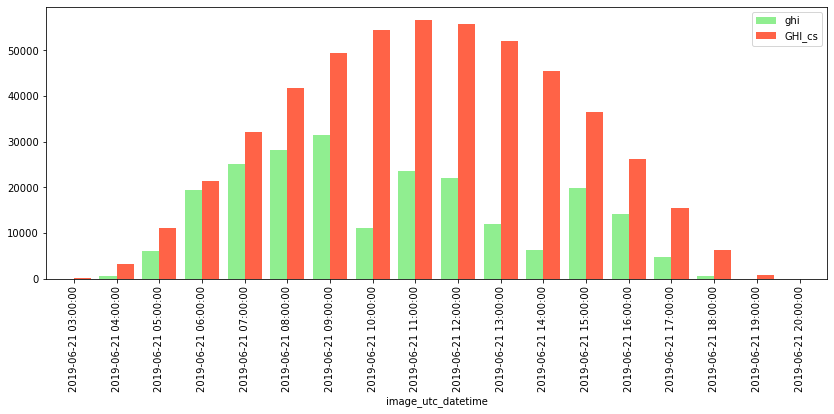

In [118]:
(df.loc[:, ['ghi', 'GHI_cs']]
   .resample('1H')
   .sum()
   .plot(kind='bar', width=0.8, color=['lightgreen', 'tomato'], figsize=(14,5))
)

check [python named colors](https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib) for more fancy coloring of your graphs

## MultiIndex

Sometimes you want to group variables on a hierarchical way, for instace we could group all irradiances together

In [119]:
df_small = df.loc[:, ['zone_name', 'camera_#', 'ghi', 'GHI_cs', 'Sun_elevation', 'Sun_azimuth_I0', 'image_path']]

let's put everything on lowercase

`.str` allows you to apply built-in string functions to all strings in a column (aka a pandas Series). These built-in functions come in handy when you want to do some basic string processing.

In [120]:
df_small.columns = df_small.columns.str.lower()

In [121]:
df_small.columns.to_list()

['zone_name',
 'camera_#',
 'ghi',
 'ghi_cs',
 'sun_elevation',
 'sun_azimuth_i0',
 'image_path']

In [122]:
camera_cols     = ['zone_name', 'camera_#']
irradiance_cols = ['ghi', 'ghi_cs']
sun_cols        = ['sun_elevation','sun_azimuth_i0']
other_cols      = ['image_path']

<AxesSubplot:xlabel='image_utc_datetime'>

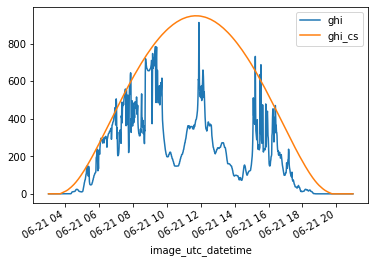

In [123]:
df_small[irradiance_cols].plot()

there are a couple of constructors to use:
- `from_product`: Cartesian product of iterables
- `from_tuple`: You pass the tuples explicitely

let's create the tuples:

In [124]:
tups = ([('camera', c) for c in camera_cols] +
        [('irradiance', c) for c in irradiance_cols] + 
        [('sun', c) for c in sun_cols] + 
        [('other', c) for c in other_cols])

In [125]:
tups

[('camera', 'zone_name'),
 ('camera', 'camera_#'),
 ('irradiance', 'ghi'),
 ('irradiance', 'ghi_cs'),
 ('sun', 'sun_elevation'),
 ('sun', 'sun_azimuth_i0'),
 ('other', 'image_path')]

In [126]:
mi = pd.MultiIndex.from_tuples(tups)
mi

MultiIndex([(    'camera',      'zone_name'),
            (    'camera',       'camera_#'),
            ('irradiance',            'ghi'),
            ('irradiance',         'ghi_cs'),
            (       'sun',  'sun_elevation'),
            (       'sun', 'sun_azimuth_i0'),
            (     'other',     'image_path')],
           )

and we replace with the new multindex:

In [127]:
df_mi = df_small.copy()
df_mi.columns = mi

In [128]:
df_mi.head()

camera          irradiance                  sun  \
                         zone_name camera_#        ghi ghi_cs sun_elevation   
image_utc_datetime                                                            
2019-06-21 03:00:01.150  Z_Tenesol        1   0.004120    0.0        -7.571   
2019-06-21 03:01:01.210  Z_Tenesol        1   0.008239    0.0        -7.449   
2019-06-21 03:02:01.200  Z_Tenesol        1   0.000000    0.0        -7.326   
2019-06-21 03:03:01.180  Z_Tenesol        1   0.004120    0.0        -7.202   
2019-06-21 03:04:01.170  Z_Tenesol        1   0.008239    0.0        -7.079   

                                        \
                        sun_azimuth_i0   
image_utc_datetime                       
2019-06-21 03:00:01.150         1320.5   
2019-06-21 03:01:01.210         1320.5   
2019-06-21 03:02:01.200         1320.5   
2019-06-21 03:03:01.180         1320.5   
2019-06-21 03:04:01.170         1320.5   

                                                                                other  
                                                                           image_path  
image_utc_datetime                                                                     
2019-06-21 03:00:01.150  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-00-01-15.png  
2019-06-21 03:01:01.210  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-01-01-21.png  
2019-06-21 03:02:01.200  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-02-01-20.png  
2019-06-21 03:03:01.180  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-03-01-18.png  
2019-06-21 03:04:01.170  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-04-01-17.png

another way of creating this beast is using `pd.concat`

In [129]:
pd.concat([df_small[camera_cols], df_small[irradiance_cols], df_small[sun_cols], df_small[other_cols]], 
          axis=1, 
          keys=['camera', 'irradiance', 'sun', 'other']).head()

camera          irradiance                  sun  \
                         zone_name camera_#        ghi ghi_cs sun_elevation   
image_utc_datetime                                                            
2019-06-21 03:00:01.150  Z_Tenesol        1   0.004120    0.0        -7.571   
2019-06-21 03:01:01.210  Z_Tenesol        1   0.008239    0.0        -7.449   
2019-06-21 03:02:01.200  Z_Tenesol        1   0.000000    0.0        -7.326   
2019-06-21 03:03:01.180  Z_Tenesol        1   0.004120    0.0        -7.202   
2019-06-21 03:04:01.170  Z_Tenesol        1   0.008239    0.0        -7.079   

                                        \
                        sun_azimuth_i0   
image_utc_datetime                       
2019-06-21 03:00:01.150         1320.5   
2019-06-21 03:01:01.210         1320.5   
2019-06-21 03:02:01.200         1320.5   
2019-06-21 03:03:01.180         1320.5   
2019-06-21 03:04:01.170         1320.5   

                                                                                other  
                                                                           image_path  
image_utc_datetime                                                                     
2019-06-21 03:00:01.150  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-00-01-15.png  
2019-06-21 03:01:01.210  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-01-01-21.png  
2019-06-21 03:02:01.200  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-02-01-20.png  
2019-06-21 03:03:01.180  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-03-01-18.png  
2019-06-21 03:04:01.170  Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-04-01-17.png

you can also flat out a multiindex and get nasty tuples back...

In [130]:
df_mi.columns.to_flat_index()

Index([  ('camera', 'zone_name'),    ('camera', 'camera_#'),
           ('irradiance', 'ghi'),  ('irradiance', 'ghi_cs'),
        ('sun', 'sun_elevation'), ('sun', 'sun_azimuth_i0'),
         ('other', 'image_path')],
      dtype='object')

Indexing is another story, we changed the columns to multiindex (for timeseries dataframes is most likely that you would do like this).

you have to pass tuples now the columns indexer, to account for this new 2 level hierarchy.

In [131]:
df_mi.loc[:, ('camera', 'zone_name')]

image_utc_datetime
2019-06-21 03:00:01.150    Z_Tenesol
2019-06-21 03:01:01.210    Z_Tenesol
2019-06-21 03:02:01.200    Z_Tenesol
2019-06-21 03:03:01.180    Z_Tenesol
2019-06-21 03:04:01.170    Z_Tenesol
                             ...    
2019-06-21 20:55:01.200    Z_Tenesol
2019-06-21 20:56:01.190    Z_Tenesol
2019-06-21 20:57:01.170    Z_Tenesol
2019-06-21 20:58:01.150    Z_Tenesol
2019-06-21 20:59:01.220    Z_Tenesol
Name: (camera, zone_name), Length: 1080, dtype: object

to recover a whole level, you use `slice(None)`, a good idea is to alias this to `All`.

In [132]:
df_mi.loc[:, ('camera', slice(None))]

camera         
                         zone_name camera_#
image_utc_datetime                         
2019-06-21 03:00:01.150  Z_Tenesol        1
2019-06-21 03:01:01.210  Z_Tenesol        1
2019-06-21 03:02:01.200  Z_Tenesol        1
2019-06-21 03:03:01.180  Z_Tenesol        1
2019-06-21 03:04:01.170  Z_Tenesol        1
...                            ...      ...
2019-06-21 20:55:01.200  Z_Tenesol        1
2019-06-21 20:56:01.190  Z_Tenesol        1
2019-06-21 20:57:01.170  Z_Tenesol        1
2019-06-21 20:58:01.150  Z_Tenesol        1
2019-06-21 20:59:01.220  Z_Tenesol        1

[1080 rows x 2 columns]

In [133]:
All = slice(None)

<AxesSubplot:xlabel='image_utc_datetime'>

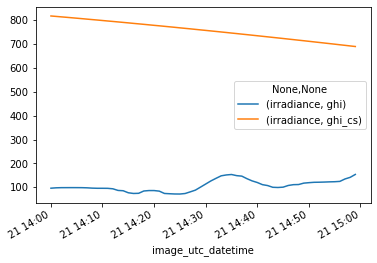

In [134]:
df_mi.loc['14h 21/6/2019', ('irradiance', All)].plot()

# Performance Tips

## 1. Pandas is column-major
Pandas is built around `DataFrame`, a concept inspired by R's Data Frame, which is, in turn, similar to tables in relational databases. A `DataFrame` is a two-dimentional table with rows and columns.

One important thing to know about pandas is that it's column-major, which explains many of its quirks.

Column-major means consecutive elements in a column are stored next to each other in memory. Row-major means the same but for elements in a row. Because modern computers process sequential data more efficiently than nonsequential data, if a table is row-major, accessing its rows will be much faster than accessing its columns.

In NumPy, major order can be specified. When a `ndarray` is created, it's row-major by default if you don't specify the order.

Like R's Data Frame, pandas' `DataFrame` is column-major. People coming to pandas from NumPy tend to treat `DataFrame` the way they would `ndarray`, e.g. trying to access data by rows, and find `DataFrame` slow.

**Note**: A column in a `DataFrame` is a `Series`. You can think of a `DataFrame` as a bunch of `Series` being stored next to each other in memory.

**For our dataset, accessing a row takes about 50x longer than accessing a column in our `DataFrame`.**

In [135]:
# Get the column `date`, 1000 loops
%timeit -n1000 df["ghi"]

# Get the first row, 1000 loops
%timeit -n1000 df.iloc[0]

1.39 µs ± 23.7 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
134 µs ± 8.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 1.1 Iterating over rows
#### 1.1.1 `.apply()`
pandas documentation has [a warning box](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#iteration) that basically tells you not to iterate over rows because it's slow.

Before iterating over rows, think about what you want to do with each row, pack that into a function and use methods like `.apply()` to apply the function to all rows.

For example, to scale the "ghi" column by the "Sun_elevation" columnd. You can also use `.apply()` with a `lambda` function.

In [136]:
%timeit -n1 df.apply(lambda x: x["ghi"] * x["Sun_elevation"], axis=1)

14.4 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


but directly doing the operation on the arrays i even faster:

In [137]:
%timeit -n1 df["ghi"]*df["Sun_elevation"]

142 µs ± 63.9 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### 1.1.2 `.iterrows()` and `.itertuples()`
If you really want to iterate over rows, one naive way is to use `.iterrows()`. It returns a generator that generates row by row and it's very slow.

In [138]:
%timeit -n1 [row for index, row in df.iterrows()]

63.8 ms ± 6.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [139]:
# This is what a row looks like as a pandas object
for index, row in df.iterrows():
    print(row)
    break

zone_name                                                                          Z_Tenesol
camera_#                                                                                   1
camera_latitude                                                                      45.8155
camera_longitude                                                                     4.72648
camera_altitude                                                                            0
timezone                                                                        Europe/Paris
image_name                                                     image19-06-21_03-00-01-15.png
image_local_datetime                                        2019-06-21 03:00:01.150000+02:00
csv_name                                                             2019_06_21_03_00_32.csv
csv_utc_datetime                                                     2019-06-21 03:00:32.000
csv_local_datetime                                                 201

`.itertuples()` returns rows in the `namedtuple` format. It still lets you access each row and it's about 40x faster than `.iterrows()`.

In [140]:
%timeit -n1 [row for row in df.itertuples()]

8.22 ms ± 998 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [141]:
# This is what a row looks like as a namedtuple.
for row in df.itertuples():
    print(row)
    break

Pandas(Index=Timestamp('2019-06-21 03:00:01.150000'), zone_name='Z_Tenesol', _2=1, camera_latitude=45.815492, camera_longitude=4.726482, camera_altitude=0.0, timezone='Europe/Paris', image_name='image19-06-21_03-00-01-15.png', image_local_datetime='2019-06-21 03:00:01.150000+02:00', csv_name='2019_06_21_03_00_32.csv', csv_utc_datetime='2019-06-21 03:00:32.000', csv_local_datetime='2019-06-21 03:00:32+02:00', ghi=0.004119568760546095, Sun_elevation=-7.5710000000000015, Sun_elevation_with_refr_corr=44.574, Sun_azimuth_I0=1320.5, TOAI=0.0, BHI_cs=0.0, BNI_cs=0.0, BTI_cs=0.0, DHI_cs=0.0, DTI_cs=0.0, GHI_cs=0.0, GTI_cs=0.0, RTI_cs=0.0, TLAM2=3.74, B_S_albedo=0.15, W_S_albedo=0.17, albedo_priority=1, Module_tilt=30.0, Module_azimuth=180.0, Module_sun_incidence=0.0, Kt=inf, image_path='Z_Tenesol/camera_01/2019-06-21/image19-06-21_03-00-01-15.png', mask_cam_path='Z_Tenesol/camera_01/mask_cam01.png', csv_path='Z_Tenesol/camera_01/2019-06-21/2019_06_21_03_00_32.csv')


#### 1.1.3 Converting DataFrame to row-major order
If you need to do a lot of row operations, you might want to convert your `DataFrame` to a NumPy's row-major `ndarray`, then iterating through the rows.

In [142]:
# Now, iterating through our DataFrame is 100x faster.
%timeit -n1 df_np = df.to_numpy(); rows = [row for row in df_np]

1.47 ms ± 271 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Accessing a row or a column of our `ndarray` takes nanoseconds instead of microseconds.

In [143]:
df_np = df.to_numpy()
%timeit -n1000 df_np[0]
%timeit -n1000 df_np[:,0]

212 ns ± 5.46 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
283 ns ± 8.99 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 1.2. Ordering slicing operations
Because pandas is column-major, if you want to do multiple slicing operations, always do the column-based slicing operations first.

For example, if you want to get the review from the first row of the data, there are two slicing operations:
- get row (row-based operation)
- get review (column-based operation)

Get row -> get review is 25x slower than get review -> get row.

**Note**: You can also just use `df.loc[0, "Review"]` to calculate the memory address to retrieve the item. Its performance is comparable to gret row then get review.

In [144]:
%timeit -n1000 df["ghi"][0]
%timeit -n1000 df.iloc[0]["ghi"]

5.28 µs ± 901 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
154 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
